In [222]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from scipy.misc import derivative


def returnStencilCoefficients(n,l,d,h):
    """ 
        Function to return the coefficients of a n-point derivative scheme
        n : Number of points in the stencil
        l : Position of the derivative in the stencil (1, mid, n)
        d : Derivative order
        h : Step size, applicable to equidistant grids 
    """
    a = [j - l for j in range(1, n + 1)]  # Relative positions of stencil points
    # Construct matrix A 
    A = [[a[j]**i for j in range(n)] for i in range(n)]
    # Construct vector b (condition vector)
    b = [math.factorial(d) if i == d else 0 for i in range(n)]
        
    A_inv = np.linalg.inv(A)
    
    # h = 1, included from trials, not needed here 
    
    # computing the stenctil coefficients c1,c2,..... (given in text as a,b,c.....)
    D = 1/h**d * np.dot(A_inv, b)
        
    return D

# function definition, as in question (This is a sine Fourier series) 
def f(x):
    summation = sum((np.sin(2 * np.pi * x * (2 * k - 1)) / (2 * k - 1)) for k in range(1, 6))
    return (4 / np.pi) * summation

# returns the analytical derivative array, takes the entire x arr as input
def analytical_derivative(x_vals):
    derivative = np.zeros_like(x_vals)
    for k in range(1, 6):
        derivative += np.cos(2 * np.pi * x_vals * (2 * k - 1))
    return (8) * derivative


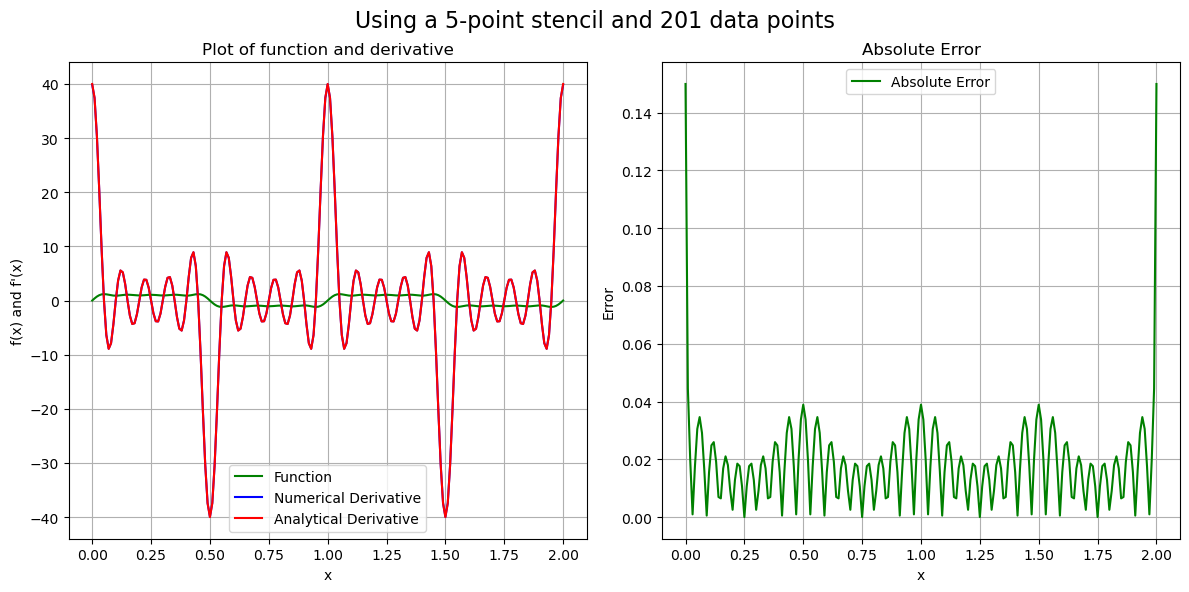

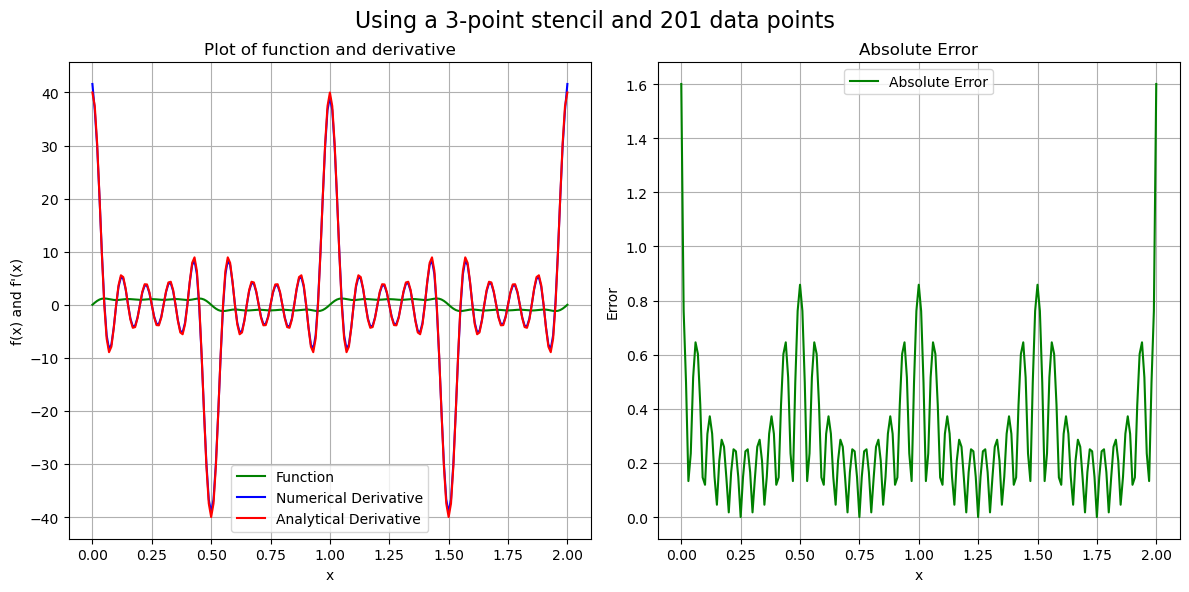

In [ ]:
a = 0
b = 2

def plotDerivativeAndAbsError(n,N): 
    """
        As we need to check the behaviour for different point schemes for different number of intervals, this is a simple yet flexible implementation
        n : Numb    er of points in the stencil
        N : number of intervals (= number of data points - 1)
    """    
    h = (b-a)/N # step size

    x_val = np.linspace(a,b,N+1) # x -arr
    fx_vals = f(x_val) # f(x) arr

    # plt.plot(x_val, fx_vals,"-" ,  label=r"$f(x) = \frac{4}{\pi} \sum_{k=1}^{5} \frac{\sin(2\pi x (2k-1))}{2k-1}$")
    # plt.legend()
    # plt.grid()

    f_prime = np.zeros(len(x_val)) # Placeholder array for the numerical derivatives

    if n==5: 
        # CALCULATING F_PRIME
        central_5_point_stencil = returnStencilCoefficients(5, (5+1)//2, 1, h)
        #applying the 5 point scheme to the central elements
        for i in range(2,len(fx_vals)-2): # leaving first and last ones out
            # temp_x = [round(x_val[k],2) for k in range(i-1,i+1+1)]
            # print(temp_x) 
            # properly being accessed
            
            temp_x = [fx_vals[k] for k in range(i-2,i+1+2)] # gives a 5-point array to calculate the derivative at current index
            
            f_prime[i] = np.dot(central_5_point_stencil, np.transpose(temp_x))
            
        forward_5_point_stencil = returnStencilCoefficients(5, 1, 1, h)
        for i in range(0,1+1): # first two only
            
            temp_x = [fx_vals[k] for k in range(i, i+5)] # gives a 5-point array to calculate the derivative at current index
            # print(temp_x)
            
            f_prime[i] = np.dot(forward_5_point_stencil, np.transpose(temp_x))
            
        backward_5_point_stencil = returnStencilCoefficients(5, 5, 1, h)
        for i in range(N-1,N+1): # last two only
            temp_x = [fx_vals[k] for k in range((i+1)-5, i+1)] # gives a 5-point array to calculate the derivative at current index
            
            f_prime[i] = np.dot(backward_5_point_stencil, np.transpose(temp_x))
    elif n==3:
        central_3_point_stencil = returnStencilCoefficients(3, (3+1)//2, 1, h)
        #applying the 3 point scheme to the central elements
        for i in range(1,len(fx_vals)-1): # leaving first and last ones out
            # temp_x = [round(x_val[k],2) for k in range(i-1,i+1+1)]
            # print(temp_x) 
            # properly being accessed
            
            temp_x = [fx_vals[k] for k in range(i-1,i+1+1)] # gives a 3-point array to calculate the derivative at current index
            
            f_prime[i] = np.dot(central_3_point_stencil, np.transpose(temp_x))
            
        forward_3_point_stencil = returnStencilCoefficients(3, 1, 1, h)
        for i in range(0,0+1): # first only
            temp_x = [fx_vals[k] for k in range(i, i+3)] # gives a 3-point array 
            
            f_prime[i] = np.dot(forward_3_point_stencil, np.transpose(temp_x))
            
        backward_3_point_stencil = returnStencilCoefficients(3, 3, 1, h)
        for i in range(N,N+1): # last only
            temp_x = [fx_vals[k] for k in range((i+1)-3, i+1)] # gives a 5-point array to calculate the derivative at current index
            
            f_prime[i] = np.dot(backward_3_point_stencil, np.transpose(temp_x))

    # CALCULATING ABSOLUTE ERROR
    f_prime_analytical = [analytical_derivative(x) for x in x_val]
    absolute_error = np.abs(f_prime - f_prime_analytical)

    # Create the figure and subplots
    plt.figure(figsize=(12, 6))

    # Plot the derivatives on the first subplot
    plt.subplot(1, 2, 1)  
    plt.plot(x_val, fx_vals, label="Function", color="green")
    plt.plot(x_val, f_prime, label="Numerical Derivative", color='blue')
    plt.plot(x_val, f_prime_analytical, label="Analytical Derivative", color='red')
    plt.xlabel("x")
    plt.ylabel("f(x) and f'(x)")
    plt.title("Plot of function and derivative")
    plt.grid()
    plt.legend()

    # Plot the absolute error on the second subplot
    plt.subplot(1, 2, 2)  
    plt.plot(x_val, absolute_error, label="Absolute Error", color='green')
    plt.xlabel("x")
    plt.ylabel("Error")
    plt.title("Absolute Error")
    plt.grid()
    plt.legend()

    # Display the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for suptitle  
    plt.suptitle(f"Using a {n}-point stencil and {N+1} data points", fontsize=16)
    plt.show()
        
plotDerivativeAndAbsError(5, 200)
plotDerivativeAndAbsError(3, 200)

In [224]:
# central_5_point_stencil = returnStencilCoefficients(5, (5+1)//2, 1, h)
# #applying the 5 point scheme to the central elements
# for i in range(2,len(fx_vals)-2): # leaving first and last ones out
#     # temp_x = [round(x_val[k],2) for k in range(i-1,i+1+1)]
#     # print(temp_x) 
#     # properly being accessed
    
#     temp_x = [fx_vals[k] for k in range(i-2,i+1+2)] # gives a 5-point array to calculate the derivative at current index
    
#     f_prime[i] = np.dot(central_5_point_stencil, np.transpose(temp_x))
    
# forward_5_point_stencil = returnStencilCoefficients(5, 1, 1, h)
# for i in range(0,1+1): # first two only
    
#     temp_x = [fx_vals[k] for k in range(i, i+5)] # gives a 5-point array to calculate the derivative at current index
#     # print(temp_x)
    
#     f_prime[i] = np.dot(forward_5_point_stencil, np.transpose(temp_x))
    
# backward_5_point_stencil = returnStencilCoefficients(5, 5, 1, h)
# for i in range(N-1,N+1): # last two only
#     temp_x = [fx_vals[k] for k in range((i+1)-5, i+1)] # gives a 5-point array to calculate the derivative at current index
    
#     f_prime[i] = np.dot(backward_5_point_stencil, np.transpose(temp_x))
    
# plt.plot(x_val, fx_vals,"-" ,  label = "Func")
# plt.plot(x_val, f_prime, "k", label = "Deriv")
# plt.legend()
# plt.grid()

In [225]:
# central_3_point_stencil = returnStencilCoefficients(3, (3+1)//2, 1, h)
# #applying the 3 point scheme to the central elements
# for i in range(1,len(fx_vals)-1): # leaving first and last ones out
#     # temp_x = [round(x_val[k],2) for k in range(i-1,i+1+1)]
#     # print(temp_x) 
#     # properly being accessed
    
#     temp_x = [fx_vals[k] for k in range(i-1,i+1+1)] # gives a 3-point array to calculate the derivative at current index
    
#     f_prime[i] = np.dot(central_3_point_stencil, np.transpose(temp_x))
    
# forward_3_point_stencil = returnStencilCoefficients(3, 1, 1, h)
# for i in range(0,0+1): # first only
#     temp_x = [fx_vals[k] for k in range(i, i+3)] # gives a 3-point array 
    
#     f_prime[i] = np.dot(forward_3_point_stencil, np.transpose(temp_x))
    
# backward_3_point_stencil = returnStencilCoefficients(3, 3, 1, h)
# for i in range(N,N+1): # last only
#     temp_x = [fx_vals[k] for k in range((i+1)-3, i+1)] # gives a 5-point array to calculate the derivative at current index
    
#     f_prime[i] = np.dot(backward_3_point_stencil, np.transpose(temp_x))
    
# plt.plot(x_val, fx_vals,"-" ,  label = "f(x)")
# plt.plot(x_val, f_prime, "k", label = "f'(x)")
# plt.legend()
# plt.grid()

In [226]:
# Function to compute the exact derivative
# def analytical_derivative(x_vals):
#     # Compute the analytical derivative for each x in x_vals
#     derivative = np.zeros_like(x_vals)
#     for k in range(1, 6):
#         derivative += np.cos(2 * np.pi * x_vals * (2 * k - 1))
#     return (8) * derivative

# f_prime_analytical = [analytical_derivative(x) for x in x_val]


# plt.plot(x_val, f_prime_analytical, "r", label="f'(x) analytical")
# plt.plot(x_val, f_prime, "k", label = "f'(x)")
# plt.legend()
# plt.grid()

In [227]:
# # absolute error calculation
# absolute_error = np.abs(f_prime - f_prime_analytical)

# plt.plot(x_val, absolute_error, "g", label = "Error")
# plt.legend()
# plt.grid()